In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

In [2]:
import pickle

# Replace 'yourfile.pickle' with the path to your actual pickle file
filename = 'AS_routes.pickle'

# Open the file in binary read mode
with open(filename, 'rb') as file:
    # Load the object from the file
   G = pickle.load(file)

# Now you can use the 'data' variable, which contains your deserialized object
print(G)

Graph with 58617 nodes and 216518 edges


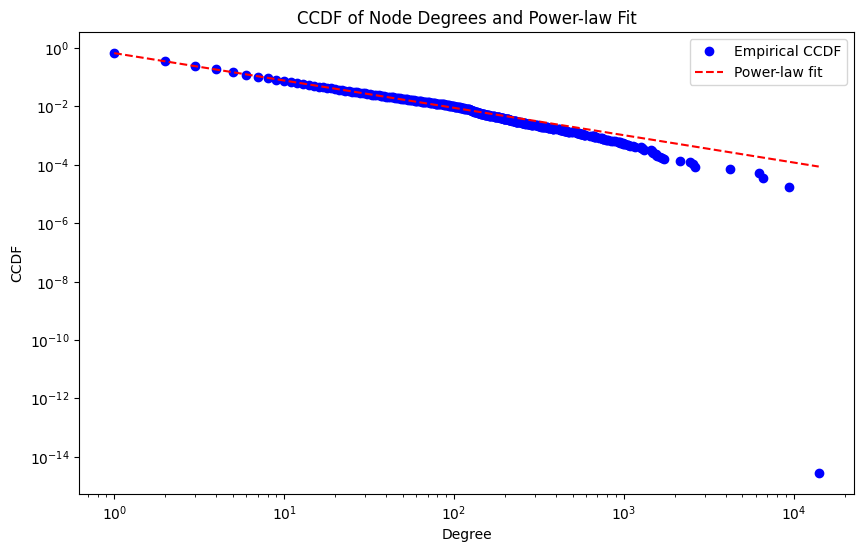

Power-law fit parameters: alpha=0.94, c=0.66
Correlation coefficient for the power-law fit: 1.00


In [3]:


# Function to calculate CCDF from degrees
def calculate_ccdf(degrees):
    unique_degrees = np.unique(degrees)
    degree_counts = np.array([np.count_nonzero(degrees == degree) for degree in unique_degrees])
    degree_probabilities = degree_counts / degree_counts.sum()
    ccdf = 1 - np.cumsum(degree_probabilities)
    return unique_degrees, ccdf

# Function to fit a power-law distribution
def power_law(x, alpha, c):
    return c * np.power(x, -alpha)

# Calculate node degrees
node_degrees = np.array([degree for node, degree in G.degree()])

# Calculate CCDF
unique_degrees, ccdf = calculate_ccdf(node_degrees)

# Fit the power-law to the CCDF
popt, _ = curve_fit(power_law, unique_degrees, ccdf, maxfev=5000)

# Calculate the correlation coefficient (R) for the power-law fit
ccdf_fit = power_law(unique_degrees, *popt)
correlation_matrix = np.corrcoef(ccdf, ccdf_fit)
correlation_coefficient = correlation_matrix[0, 1]

# Plot the CCDF and the fitted power-law
plt.figure(figsize=(10, 6))
plt.loglog(unique_degrees, ccdf, marker='o', linestyle='', color='b', label='Empirical CCDF')
plt.loglog(unique_degrees, ccdf_fit, color='r', linestyle='--', label='Power-law fit')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.title('CCDF of Node Degrees and Power-law Fit')
plt.legend()
plt.show()

print(f'Power-law fit parameters: alpha={popt[0]:.2f}, c={popt[1]:.2f}')
print(f'Correlation coefficient for the power-law fit: {correlation_coefficient:.2f}')
